<a href="https://colab.research.google.com/github/QuakFooLee/python/blob/main/2024_07_04_IoT_in_Medical_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -q numpy pandas scikit-learn matplotlib

   heart_rate  systolic_bp  diastolic_bp
0  140.460962   186.001309    123.051081
1   68.617357   133.869505     78.554813
2   76.476885   120.894456     72.075801
3   85.230299   110.295948     76.920385
4   67.658466   130.473350     61.063853


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


     heart_rate  systolic_bp  diastolic_bp  anomaly
0    140.460962   186.001309    123.051081        1
23    55.752518   152.134055     66.911796        1
24    64.556173   145.913148     49.804878        1
35    57.791564   143.609801    107.596600        1
50   145.698075   177.684193    120.784865        1
61    68.143410    77.271861     78.626282        1
66    69.279899   100.579778     55.611828        1
83    64.817298   151.151220     57.038190        1
100  147.931972   177.942867    117.067344        1
101   65.793547    76.556169     70.979484        1
150  159.438438   185.769504    121.121082        1
160   60.253183    82.508914     68.885420        1
200  152.782766   170.651292    123.573049        1
209  108.527315   146.243651     79.992914        1
250  143.322592   178.057396    109.750294        1
252   91.221562    90.093965     65.488243        1
258   74.438194   109.424822     53.957861        1
262   37.587327   128.081340     92.357822        1
300  152.430

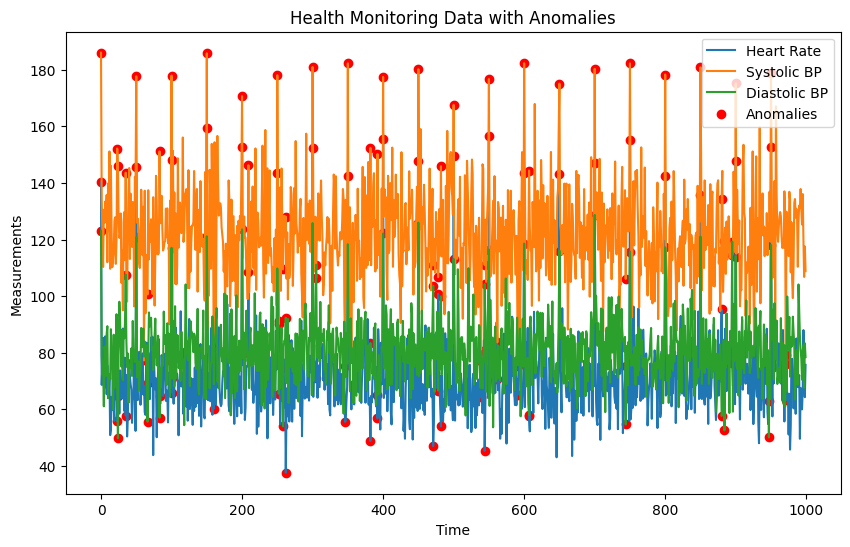

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Step 1: Generate Sample Dataset
np.random.seed(42)

# Simulate data for heart rate (bpm) and blood pressure (systolic and diastolic)
num_samples = 1000
heart_rate = np.random.normal(70, 10, num_samples)
systolic_bp = np.random.normal(120, 15, num_samples)
diastolic_bp = np.random.normal(80, 10, num_samples)

# Introduce some anomalies
heart_rate[::50] = np.random.normal(150, 5, num_samples // 50)
systolic_bp[::50] = np.random.normal(180, 5, num_samples // 50)
diastolic_bp[::50] = np.random.normal(120, 5, num_samples // 50)

# Create a DataFrame
data = pd.DataFrame({
    'heart_rate': heart_rate,
    'systolic_bp': systolic_bp,
    'diastolic_bp': diastolic_bp
})

print(data.head())

# Step 2: Train Isolation Forest Model
model = IsolationForest(contamination=0.05)
model.fit(data)

# Step 3: Detect Anomalies
data['anomaly'] = model.predict(data)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # 0: normal, 1: anomaly

# Print anomalies
anomalies = data[data['anomaly'] == 1]
print(anomalies)

# Step 4: Visualize the Data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['heart_rate'], label='Heart Rate')
plt.plot(data.index, data['systolic_bp'], label='Systolic BP')
plt.plot(data.index, data['diastolic_bp'], label='Diastolic BP')
plt.scatter(anomalies.index, anomalies['heart_rate'], color='red', label='Anomalies')
plt.scatter(anomalies.index, anomalies['systolic_bp'], color='red')
plt.scatter(anomalies.index, anomalies['diastolic_bp'], color='red')
plt.xlabel('Time')
plt.ylabel('Measurements')
plt.legend()
plt.title('Health Monitoring Data with Anomalies')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


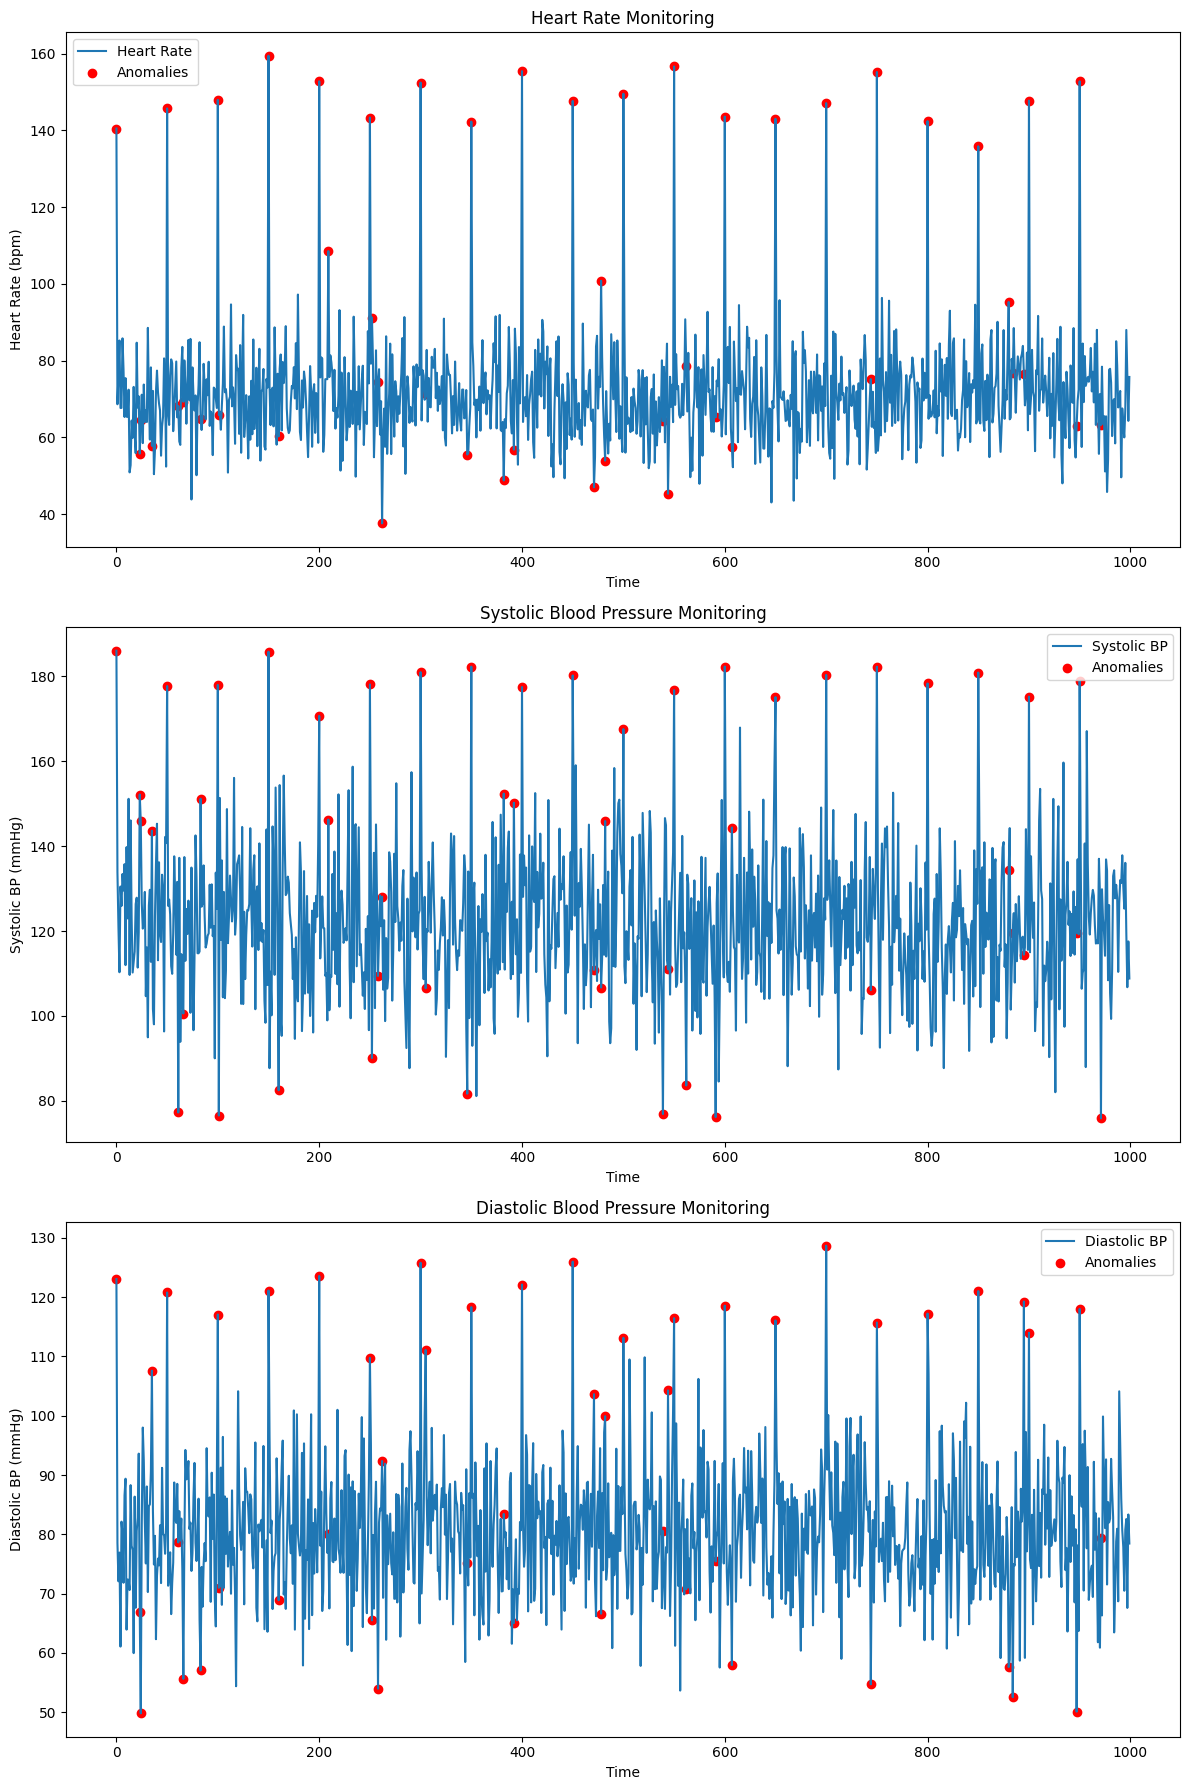

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Step 1: Generate Sample Dataset
np.random.seed(42)

# Simulate data for heart rate (bpm) and blood pressure (systolic and diastolic)
num_samples = 1000
heart_rate = np.random.normal(70, 10, num_samples)
systolic_bp = np.random.normal(120, 15, num_samples)
diastolic_bp = np.random.normal(80, 10, num_samples)

# Introduce some anomalies
heart_rate[::50] = np.random.normal(150, 5, num_samples // 50)
systolic_bp[::50] = np.random.normal(180, 5, num_samples // 50)
diastolic_bp[::50] = np.random.normal(120, 5, num_samples // 50)

# Create a DataFrame
data = pd.DataFrame({
    'heart_rate': heart_rate,
    'systolic_bp': systolic_bp,
    'diastolic_bp': diastolic_bp
})

# Step 2: Train Isolation Forest Model
model = IsolationForest(contamination=0.05)
model.fit(data)

# Step 3: Detect Anomalies
data['anomaly'] = model.predict(data)
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # 0: normal, 1: anomaly

# Print anomalies
anomalies = data[data['anomaly'] == 1]

# Step 4: Visualize the Data in Separate Plots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Heart Rate Plot
axs[0].plot(data.index, data['heart_rate'], label='Heart Rate')
axs[0].scatter(anomalies.index, anomalies['heart_rate'], color='red', label='Anomalies')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Heart Rate (bpm)')
axs[0].legend()
axs[0].set_title('Heart Rate Monitoring')

# Systolic BP Plot
axs[1].plot(data.index, data['systolic_bp'], label='Systolic BP')
axs[1].scatter(anomalies.index, anomalies['systolic_bp'], color='red', label='Anomalies')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Systolic BP (mmHg)')
axs[1].legend()
axs[1].set_title('Systolic Blood Pressure Monitoring')

# Diastolic BP Plot
axs[2].plot(data.index, data['diastolic_bp'], label='Diastolic BP')
axs[2].scatter(anomalies.index, anomalies['diastolic_bp'], color='red', label='Anomalies')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Diastolic BP (mmHg)')
axs[2].legend()
axs[2].set_title('Diastolic Blood Pressure Monitoring')

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Step 1: Generate Sample Dataset
np.random.seed(42)
num_samples = 1000
heart_rate = np.random.normal(70, 10, num_samples)
systolic_bp = np.random.normal(120, 15, num_samples)
diastolic_bp = np.random.normal(80, 10, num_samples)

# Introduce some anomalies for cardiac events
heart_rate[::50] = np.random.normal(150, 5, num_samples // 50)
systolic_bp[::50] = np.random.normal(180, 5, num_samples // 50)
diastolic_bp[::50] = np.random.normal(120, 5, num_samples // 50)

# Create a DataFrame
data = pd.DataFrame({
    'heart_rate': heart_rate,
    'systolic_bp': systolic_bp,
    'diastolic_bp': diastolic_bp
})

# Create labels for cardiac events (1 for event, 0 for normal)
data['label'] = 0
data.loc[::50, 'label'] = 1

# Step 2: Preprocess Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['heart_rate', 'systolic_bp', 'diastolic_bp']])
data_scaled = pd.DataFrame(data_scaled, columns=['heart_rate', 'systolic_bp', 'diastolic_bp'])
data_scaled['label'] = data['label']

# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length), :-1]
        y = data.iloc[i + seq_length, -1]
        xs.append(x.values)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split into training and test sets
split_ratio = 0.8
split = int(split_ratio * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 3: Build and Train LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(SEQ_LENGTH, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Step 4: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Show some predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(predictions.head(20))


Epoch 1/50
20/20 [==============================] - 3s 39ms/step - loss: 0.6205 - accuracy: 0.8436 - val_loss: 0.5188 - val_accuracy: 0.9748
Epoch 2/50
20/20 [==============================] - 0s 9ms/step - loss: 0.3109 - accuracy: 0.9810 - val_loss: 0.1393 - val_accuracy: 0.9748
Epoch 3/50
20/20 [==============================] - 0s 9ms/step - loss: 0.1137 - accuracy: 0.9810 - val_loss: 0.1396 - val_accuracy: 0.9748
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0993 - accuracy: 0.9810 - val_loss: 0.1189 - val_accuracy: 0.9748
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0940 - accuracy: 0.9810 - val_loss: 0.1175 - val_accuracy: 0.9748
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0945 - accuracy: 0.9810 - val_loss: 0.1180 - val_accuracy: 0.9748
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0914 - accuracy: 0.9810 - val_loss: 0.1137 - val_accuracy: 0.9748
Epoch 8/50
20/20 [=

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping

# Step 1: Generate Sample Dataset
np.random.seed(42)
num_samples = 1000
heart_rate = np.random.normal(70, 10, num_samples)
systolic_bp = np.random.normal(120, 15, num_samples)
diastolic_bp = np.random.normal(80, 10, num_samples)
spo2 = np.random.normal(98, 1, num_samples)
respiratory_rate = np.random.normal(16, 2, num_samples)
body_temp = np.random.normal(37, 0.5, num_samples)
activity_level = np.random.normal(1, 0.2, num_samples)

# Introduce some anomalies for health events
heart_rate[::50] = np.random.normal(150, 5, num_samples // 50)
systolic_bp[::50] = np.random.normal(180, 5, num_samples // 50)
diastolic_bp[::50] = np.random.normal(120, 5, num_samples // 50)
spo2[::50] = np.random.normal(85, 2, num_samples // 50)
respiratory_rate[::50] = np.random.normal(30, 2, num_samples // 50)
body_temp[::50] = np.random.normal(39, 0.5, num_samples // 50)

# Create a DataFrame
data = pd.DataFrame({
    'heart_rate': heart_rate,
    'systolic_bp': systolic_bp,
    'diastolic_bp': diastolic_bp,
    'spo2': spo2,
    'respiratory_rate': respiratory_rate,
    'body_temp': body_temp,
    'activity_level': activity_level
})

# Create labels for cardiac events and respiratory distress (1 for event, 0 for normal)
data['label'] = 0
data.loc[::50, 'label'] = 1

# Step 2: Preprocess Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['heart_rate', 'systolic_bp', 'diastolic_bp', 'spo2', 'respiratory_rate', 'body_temp', 'activity_level']])
data_scaled = pd.DataFrame(data_scaled, columns=['heart_rate', 'systolic_bp', 'diastolic_bp', 'spo2', 'respiratory_rate', 'body_temp', 'activity_level'])
data_scaled['label'] = data['label']

# Create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length), :-1]
        y = data.iloc[i + seq_length, -1]
        xs.append(x.values)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 10
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split into training and test sets
split_ratio = 0.8
split = int(split_ratio * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 3: Build and Train the Model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(SEQ_LENGTH, X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Step 4: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Show some predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(predictions.head(20))


Epoch 1/50
20/20 [==============================] - 10s 61ms/step - loss: 0.4009 - accuracy: 0.9526 - val_loss: 0.1222 - val_accuracy: 0.9748
Epoch 2/50
20/20 [==============================] - 0s 10ms/step - loss: 0.1022 - accuracy: 0.9810 - val_loss: 0.1335 - val_accuracy: 0.9748
Epoch 3/50
20/20 [==============================] - 0s 11ms/step - loss: 0.0961 - accuracy: 0.9810 - val_loss: 0.1163 - val_accuracy: 0.9748
Epoch 4/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0939 - accuracy: 0.9810 - val_loss: 0.1149 - val_accuracy: 0.9748
Epoch 5/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0942 - accuracy: 0.9810 - val_loss: 0.1168 - val_accuracy: 0.9748
Epoch 6/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0928 - accuracy: 0.9810 - val_loss: 0.1140 - val_accuracy: 0.9748
Epoch 7/50
20/20 [==============================] - 0s 12ms/step - loss: 0.0910 - accuracy: 0.9810 - val_loss: 0.1151 - val_accuracy: 0.9748
Epoch 8/50
2